## 3 - Converting Mel Spectogtam to Log-Mel Spectogram


In [14]:

from scripts.data_loader import load_ravdess_dataset

df = load_ravdess_dataset("data/ravdess_actors")
print("\nFirst few rows:")
print(df.head())


First few rows:
                                                path  emotion
0  data\ravdess_actors\Actor_01\03-01-01-01-01-01...  neutral
1  data\ravdess_actors\Actor_01\03-01-01-01-01-02...  neutral
2  data\ravdess_actors\Actor_01\03-01-01-01-02-01...  neutral
3  data\ravdess_actors\Actor_01\03-01-01-01-02-02...  neutral
4  data\ravdess_actors\Actor_01\03-01-02-01-01-01...     calm


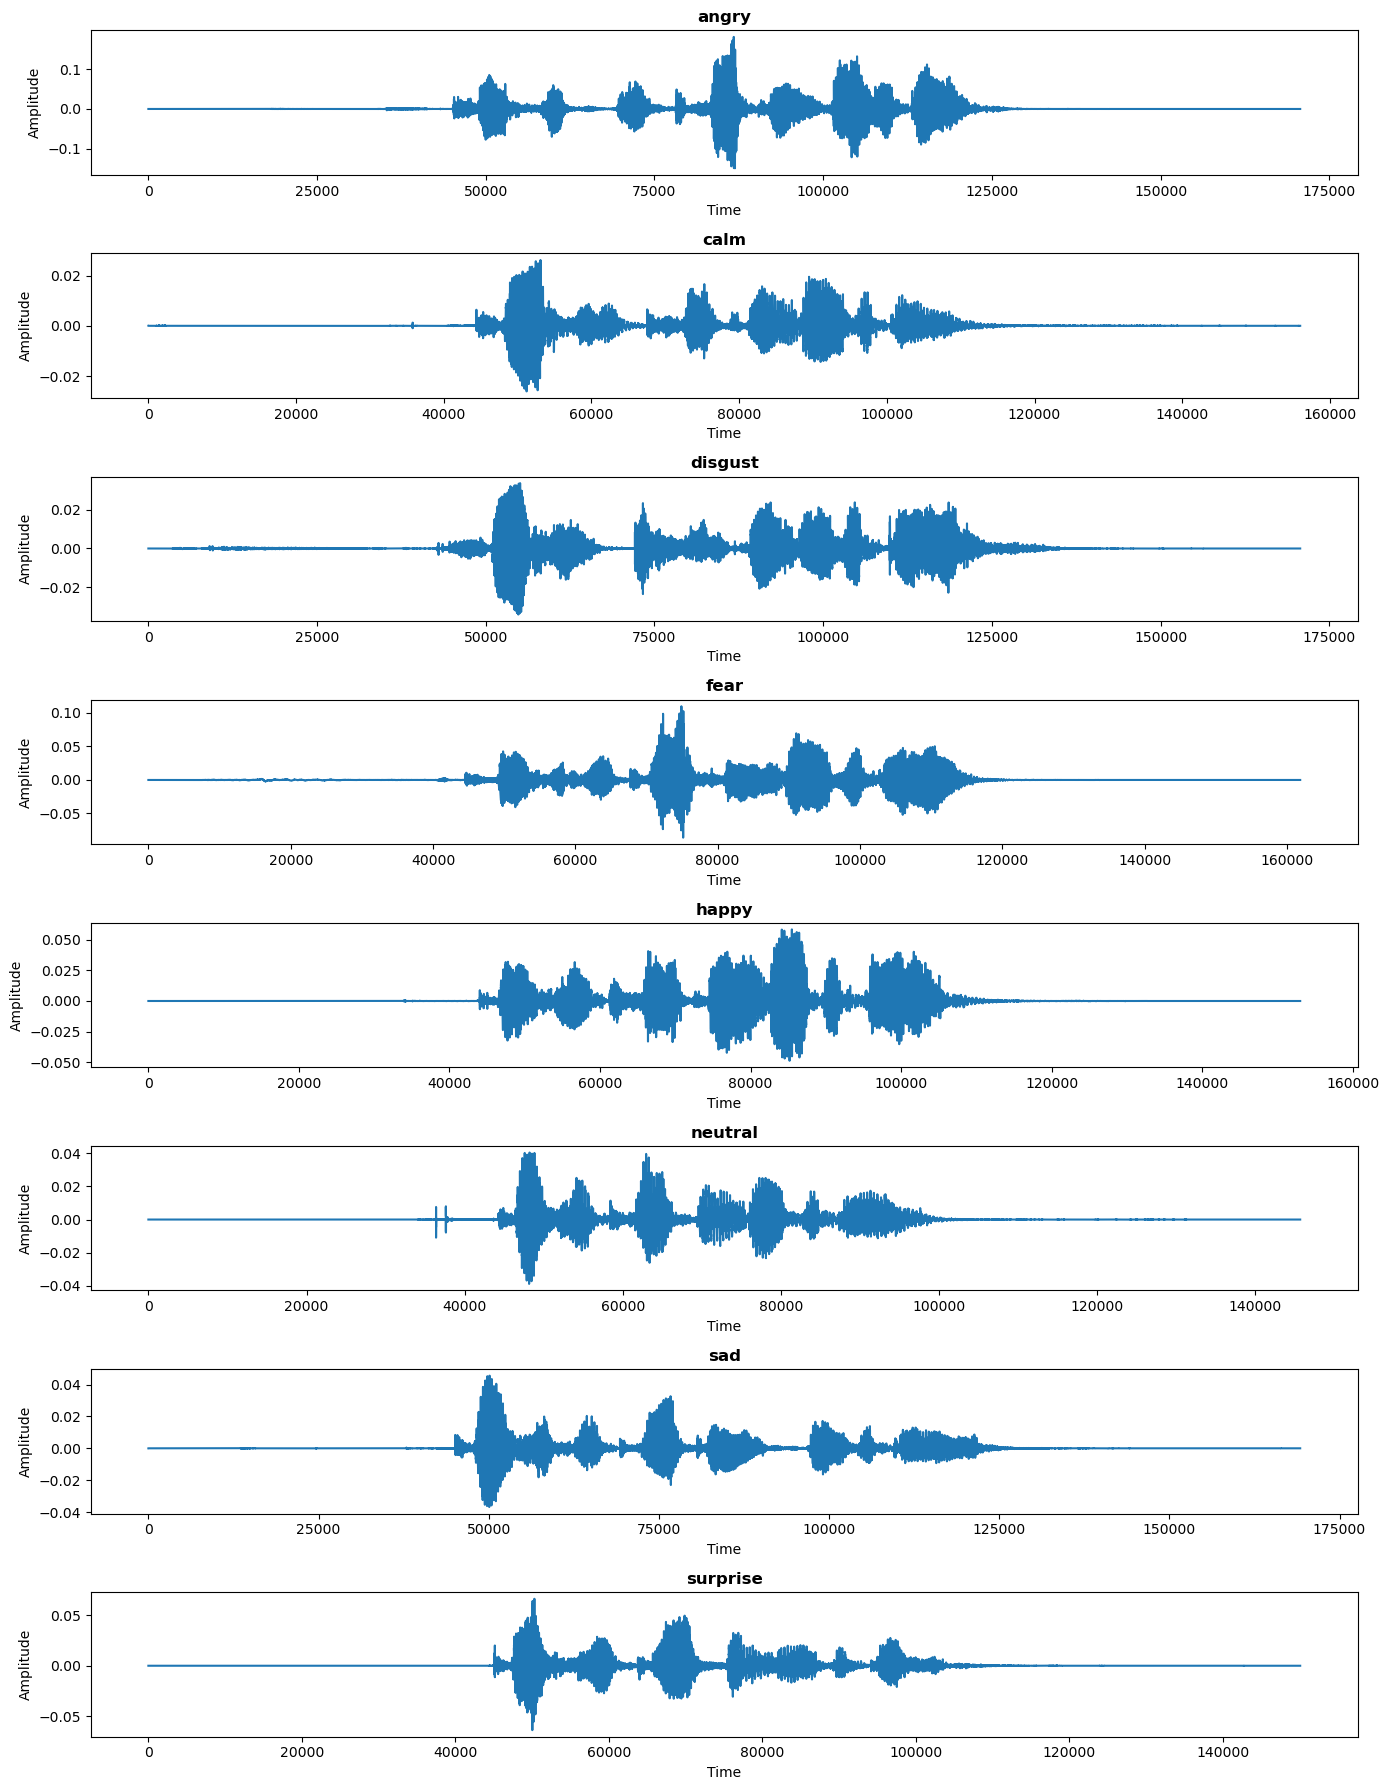

In [15]:
import librosa

import matplotlib.pyplot as plt

# Get one sample per emotion
sample_df = df.groupby('emotion').first().reset_index()

plt.figure(figsize=(14, 18))
for idx, row in sample_df.iterrows():
    audio_path = str(row['path'])
    emotion = row['emotion']
    y, sr = librosa.load(audio_path, sr=44100)
    plt.subplot(len(sample_df), 1, idx + 1)
    plt.plot(y)
    plt.title(f"{emotion}", fontweight='bold')
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

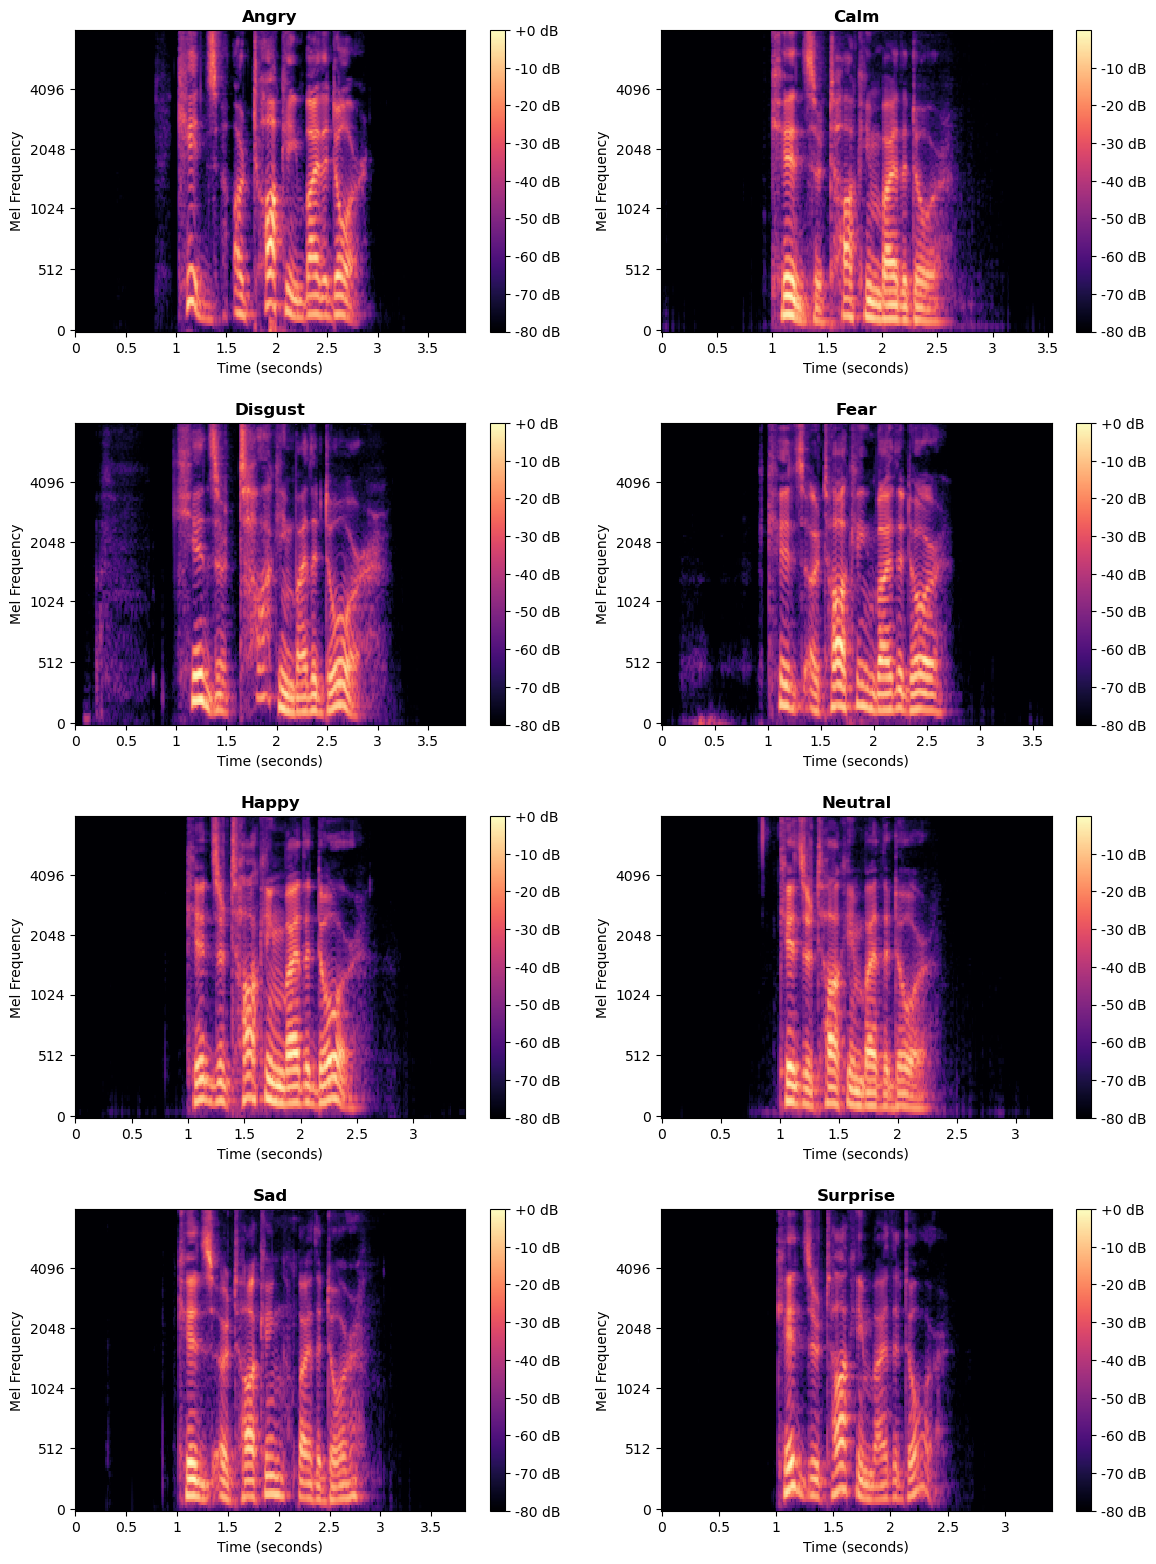

In [16]:
import numpy as np
import librosa.display

# Get one sample per emotion
sample_df = df.groupby('emotion').first().reset_index()
sample_paths = sample_df['path'].tolist()
sample_emotions = sample_df['emotion'].tolist()

plt.figure(figsize=(12, 16))
for i in range(len(sample_paths)):
    plt.subplot(4, 2, i + 1)
    # Load the audio file, standardize the sampling rate
    signal, sr = librosa.load(sample_paths[i], sr=44100)
    # Make the logarithmically scaled mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128, fmax=8000)
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)
    # Plot the spectrogram
    img = librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.title(sample_emotions[i].capitalize(), fontweight='bold')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mel Frequency')
    plt.colorbar(img, format='%+2.0f dB')
plt.tight_layout(pad=2)
plt.show()

### Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode the emotion labels into numbers
encoder = LabelEncoder()
df['emotion_encoded'] = encoder.fit_transform(df['emotion'])

# Make sure the encoding worked
print(df['emotion_encoded'].value_counts())

emotion_encoded
1    192
4    192
6    192
0    192
3    192
2    192
7    192
5     96
Name: count, dtype: int64


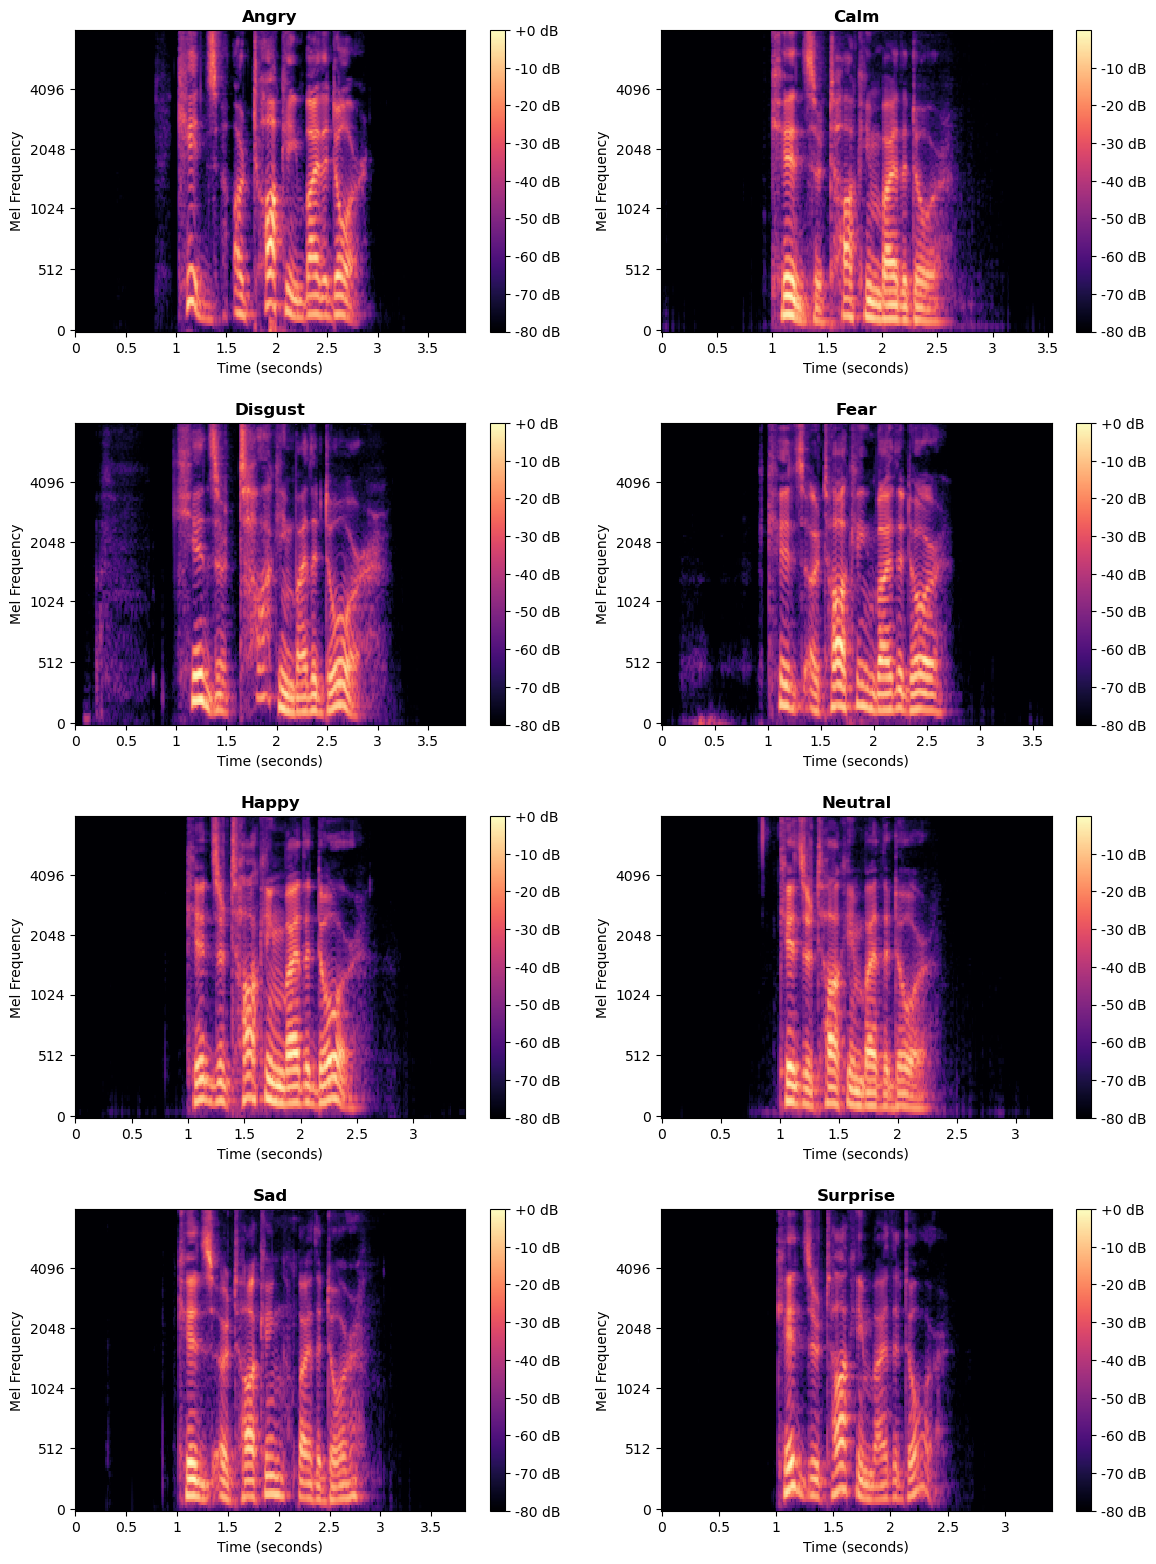

In [23]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Get one sample per emotion
sample_df = df.groupby('emotion').first().reset_index()
sample_paths = sample_df['path'].tolist()
sample_emotions = sample_df['emotion'].tolist()

plt.figure(figsize=(12, 16))
for i in range(len(sample_paths)):
    plt.subplot(4, 2, i + 1)
    # Load the audio file, standardize the sampling rate
    signal, sr = librosa.load(sample_paths[i], sr=44100)
    # Make the logarithmically scaled mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128, fmax=8000)
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)
    # Plot the spectrogram
    img = librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.title(sample_emotions[i].capitalize(), fontweight='bold')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mel Frequency')
    plt.colorbar(img, format='%+2.0f dB')
plt.tight_layout(pad=2)
plt.show()

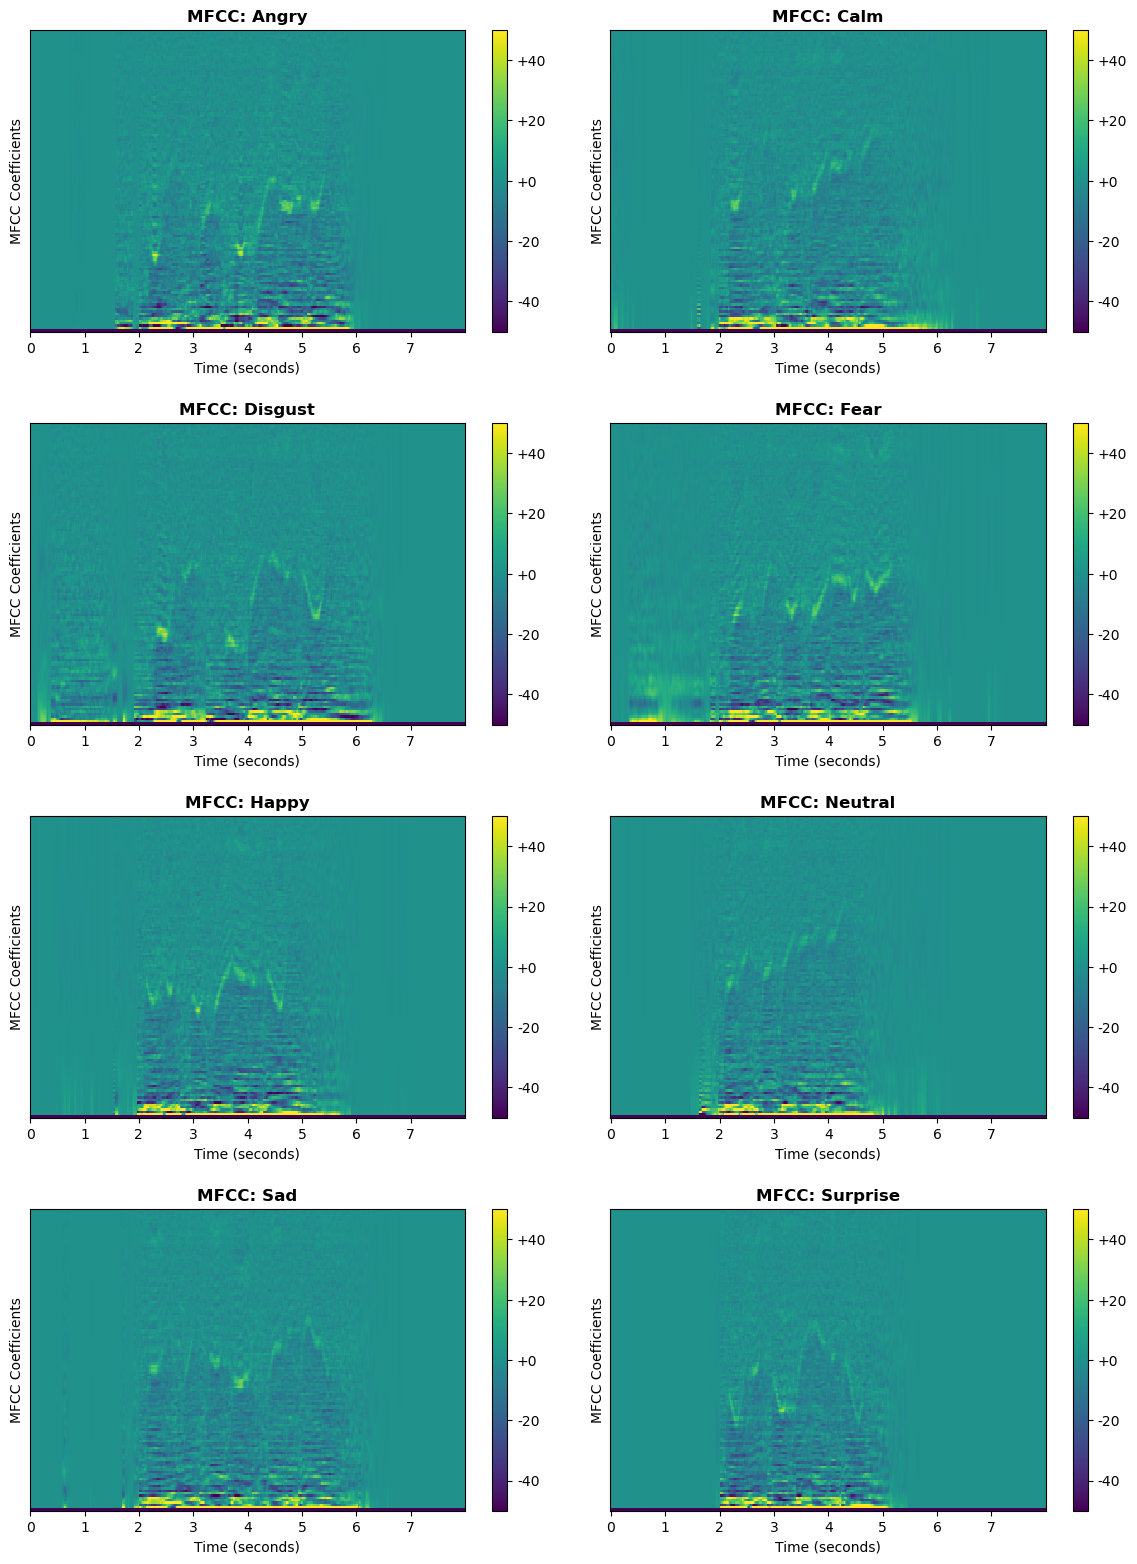

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scripts.extract_features import extract_mfcc

# Extract MFCCs for a sample of each emotion
sample_df = df.groupby('emotion').first().reset_index()
sample_paths = sample_df['path'].tolist()
sample_emotions = sample_df['emotion'].tolist()

plt.figure(figsize=(12, 16))
for i in range(len(sample_paths)):
    mfcc = extract_mfcc(sample_paths[i])
    plt.subplot(4, 2, i + 1)
    librosa.display.specshow(
        mfcc,
        x_axis='time',
        cmap='viridis',  
        norm=Normalize(vmin=-50, vmax=50)
    )
    plt.title(f'MFCC: {sample_emotions[i].capitalize()}', fontweight='bold')
    plt.xlabel('Time (seconds)')
    plt.ylabel('MFCC Coefficients')
    plt.colorbar(format='%+2.0f')
plt.tight_layout(pad=2)
plt.show()

In [43]:
# Divide the data into features and labels using MFCCs
X_mfcc = [extract_mfcc(path) for path in df['path']]
y_mfcc = df['emotion']

In [44]:
print("Number of features (X):", len(X_mfcc))
print("Number of labels (y):", len(y_mfcc))

Number of features (X): 1440
Number of labels (y): 1440


Label: angry


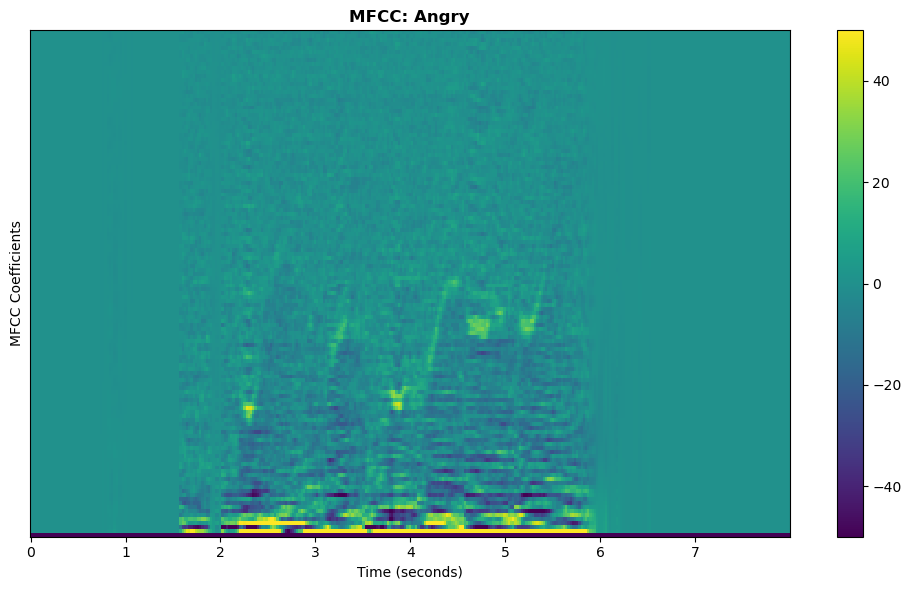

In [45]:
from matplotlib.colors import Normalize

# Print the first image (MFCC) and its corresponding label
print('Label:', sample_emotions[0])  
plt.figure(figsize=(10, 6))
librosa.display.specshow(
       extract_mfcc(sample_paths[0]),
        x_axis='time',
        cmap='viridis',  
        norm=Normalize(vmin=-50, vmax=50)
    )
plt.colorbar()
plt.title(f'MFCC: {sample_emotions[0].capitalize()}', fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

# Split MFCC features and labels into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_mfcc, y_mfcc, test_size=0.2, random_state=42, stratify=y_mfcc)

In [49]:
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

Length of X_train: 1152
Length of y_train: 1152
Length of X_test: 288
Length of y_test: 288


In [53]:
# Convert the lists into numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# Check the shape of the arrays
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1152, 128, 345)
X_test shape: (288, 128, 345)
y_train shape: (1152,)
y_test shape: (288,)


In [54]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [55]:
# Check the mean and standard deviation
print('Mean:', mean)
print('Standard deviation:', std)
# Check if the data is standardized
print('Mean of standardized data:', np.mean(X_train))
print('Standard deviation of standardized data:', np.std(X_train))

Mean: -4.6649127
Standard deviation: 58.46713
Mean of standardized data: -3.51689e-08
Standard deviation of standardized data: 1.0000019


In [56]:
# Reshape the data into 4D arrays so that it can be input into the 2D CNN
X_train = X_train.reshape(X_train.shape[0], 128, 345, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 345, 1)
# Check the shape of the arrays
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1152, 128, 345, 1)
X_test shape: (288, 128, 345, 1)


In [58]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(encoder.transform(y_train), dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(encoder.transform(y_test), dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders with batch size 32, shuffle, and prefetch (num_workers > 0)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)